In [1]:
#Import libraries
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Getting the Dataset.
- The dataset has been imported with latin-1 encoding method.


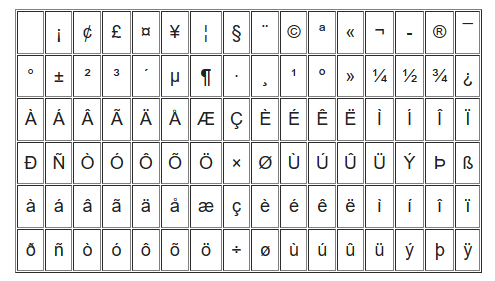

In [3]:
df = pd.read_csv('Hamspam.csv', encoding='latin-1')
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


<Axes: xlabel='type', ylabel='count'>

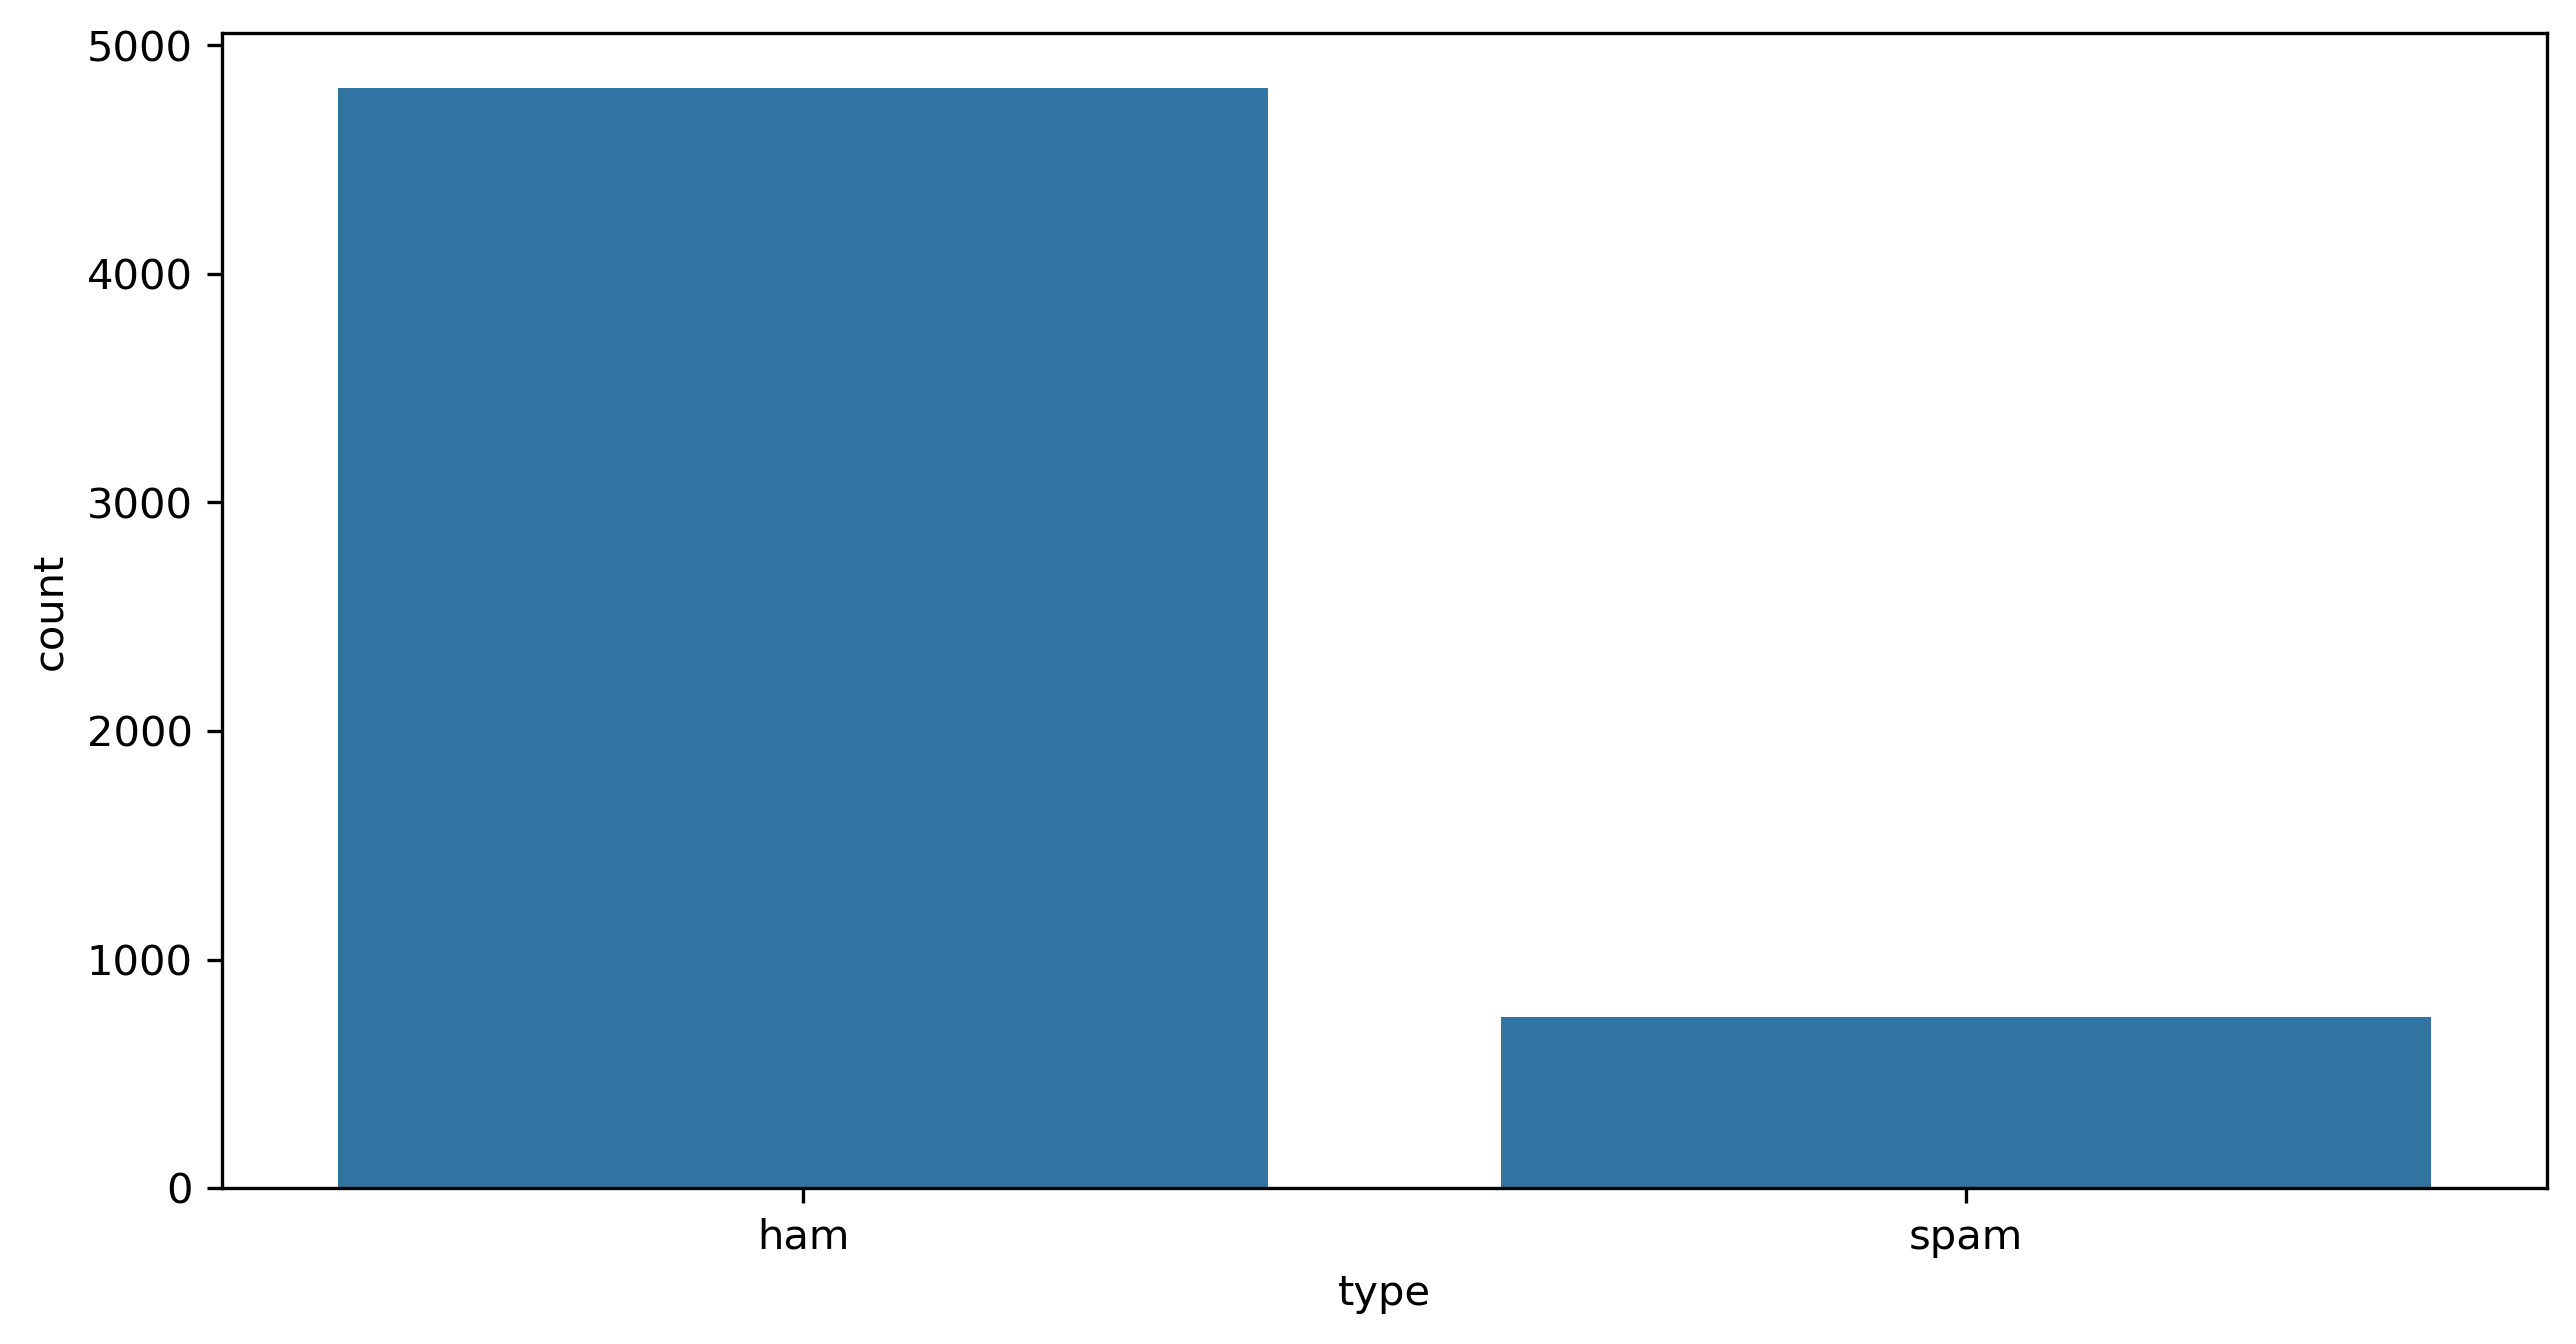

In [4]:
sns.countplot(x = df['type'])

In [5]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [6]:
df.isna().sum()

type    0
text    0
dtype: int64

In [7]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
#Labeling 0 and 1

In [8]:
df['label'] = df['type'].map({'spam':1,'ham':0})

In [9]:
df

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0
5556,spam,"If you don't, your prize will go to another cu...",1
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1


In [ ]:
#Ham and Spam data

In [10]:
df[df['type'] == 'ham']

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
5,ham,Aiya we discuss later lar... Pick u up at 4 is...,0
6,ham,Are you this much buzy,0
...,...,...,...
5552,ham,Already one guy loving you:-.,0
5553,ham,Prepare to be pounded every night...,0
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0


In [11]:
df[df['type']=='spam']

,type,text,label
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
8,spam,Marvel Mobile Play the official Ultimate Spide...,1
19,spam,U can WIN å£100 of Music Gift Vouchers every w...,1
34,spam,U have won a nokia 6230 plus a free digital ca...,1
...,...,...,...
5532,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,1
5538,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,1
5551,spam,Ur balance is now å£500. Ur next question is: ...,1
5556,spam,"If you don't, your prize will go to another cu...",1


In [12]:
ham = df[df['type'] == 'ham']
spam = df[df['type'] == 'spam']

In [13]:
ham

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
5,ham,Aiya we discuss later lar... Pick u up at 4 is...,0
6,ham,Are you this much buzy,0
...,...,...,...
5552,ham,Already one guy loving you:-.,0
5553,ham,Prepare to be pounded every night...,0
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0


In [14]:
spam

,type,text,label
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
8,spam,Marvel Mobile Play the official Ultimate Spide...,1
19,spam,U can WIN å£100 of Music Gift Vouchers every w...,1
34,spam,U have won a nokia 6230 plus a free digital ca...,1
...,...,...,...
5532,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,1
5538,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,1
5551,spam,Ur balance is now å£500. Ur next question is: ...,1
5556,spam,"If you don't, your prize will go to another cu...",1


In [ ]:
# !pip install wordcloud

In [ ]:
#Worldcloud function

In [15]:
ham['text']

0       Hope you are having a good week. Just checking in
1                                 K..give back my thanks.
2             Am also doing in cbe only. But have to pay.
5       Aiya we discuss later lar... Pick u up at 4 is...
6                                  Are you this much buzy
                              ...                        
5552                        Already one guy loving you:-.
5553                 Prepare to be pounded every night...
5554    You are a great role model. You are giving so ...
5555    Awesome, I remember the last time we got someb...
5558                      Shall call now dear having food
Name: text, Length: 4812, dtype: object

In [16]:
spam['text']

3       complimentary 4 STAR Ibiza Holiday or å£10,000...
4       okmail: Dear Dave this is your final notice to...
8       Marvel Mobile Play the official Ultimate Spide...
19      U can WIN å£100 of Music Gift Vouchers every w...
34      U have won a nokia 6230 plus a free digital ca...
                              ...                        
5532    Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
5538    HOT LIVE FANTASIES call now 08707509020 Just 2...
5551    Ur balance is now å£500. Ur next question is: ...
5556    If you don't, your prize will go to another cu...
5557    SMS. ac JSco: Energy is high, but u may not kn...
Name: text, Length: 747, dtype: object

In [17]:
def worldcl(data,heading):
    txt = ' '.join(data['text'])
    wc = WordCloud(background_color='white',width=700, height=200,
                  colormap='viridis').generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

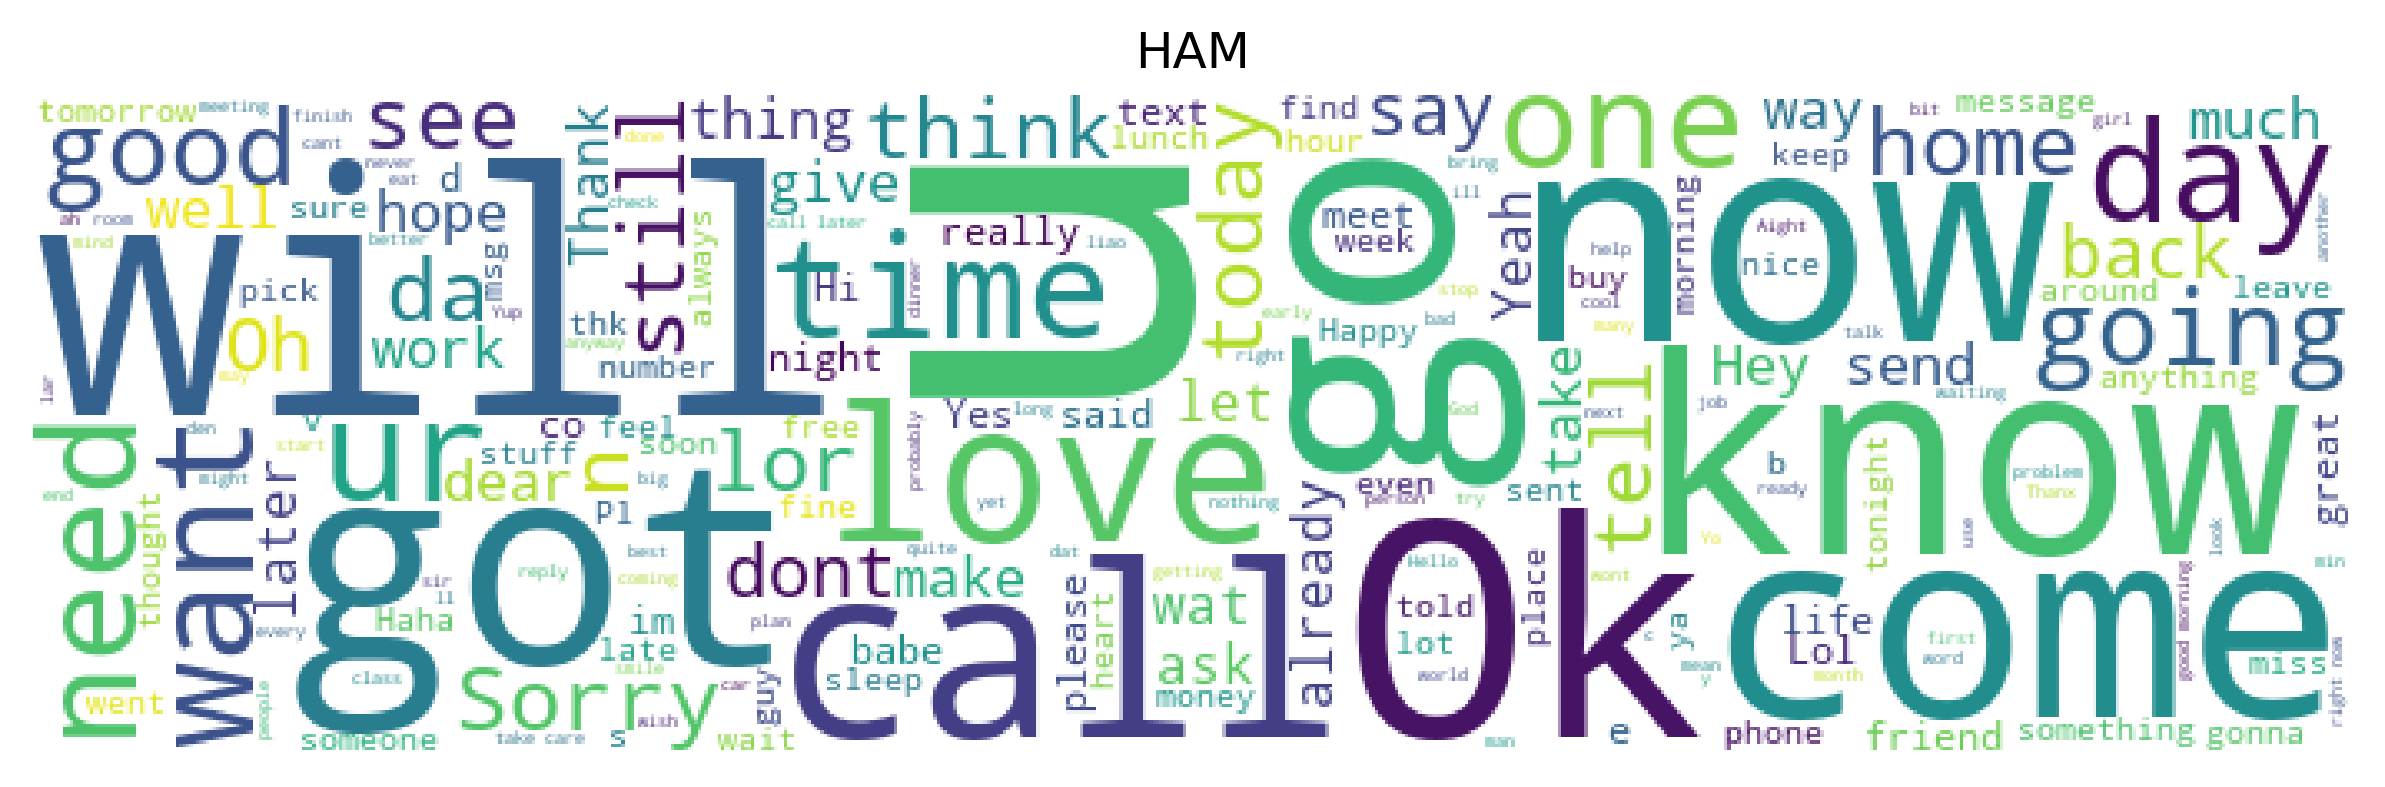

In [18]:
worldcl(ham,'HAM')

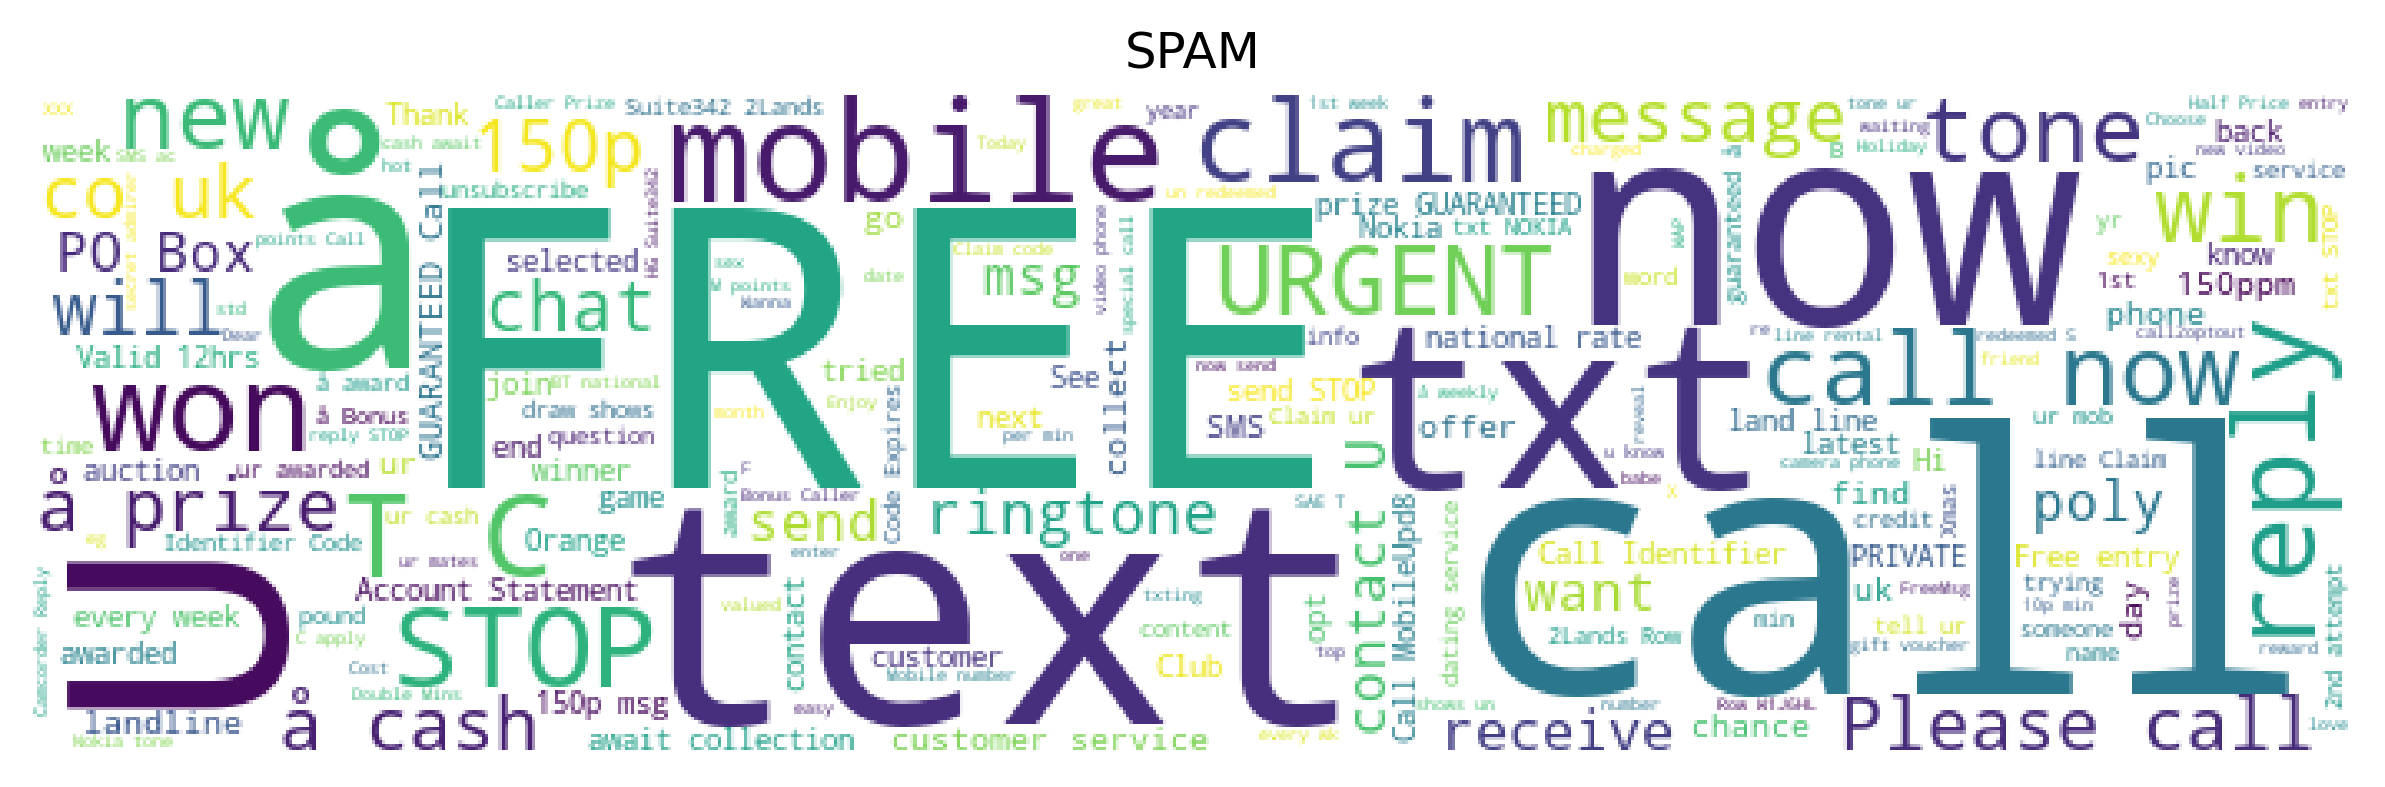

In [19]:
worldcl(spam,'SPAM')

# Text cleaning
1. Remove unwanted characters
2. Text normalization
3. Tokenization
4. lemmatization
5. Join the text

In [20]:
df

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0
5556,spam,"If you don't, your prize will go to another cu...",1
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1


In [21]:
lemma = WordNetLemmatizer()

In [22]:
df['text'][0]

'Hope you are having a good week. Just checking in'

In [23]:
range(len(df))

range(0, 5559)

In [24]:
df['text'][0]

'Hope you are having a good week. Just checking in'

In [25]:
corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['text'][i]) #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split() #Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

In [26]:
corpus

['hope good week checking',
 'k give back thanks',
 'also cbe pay',
 'complimentary star ibiza holiday cash need urgent collection landline lose box sk wp ppm',
 'okmail dear dave final notice collect tenerife holiday cash award call landline tc sae box cw wx ppm',
 'aiya discus later lar pick u',
 'much buzy',
 'please ask mummy call father',
 'marvel mobile play official ultimate spider man game ur mobile right text spider game send u free ball wallpaper',
 'fyi usf swing room whenever',
 'sure thing big man hockey election go longer hour though',
 'anything lor',
 'march ending ready call sure problem capital never complete far work lady',
 'hmm well night night',
 'k sure get noon see',
 'ha ha cool cool chikku chikku db',
 'darren saying dat u meeting da ge den dun meet dinner co later u leave xy feel awkward den u meet lunch lor',
 'dint tell anything angry told abi',
 'u u wan come come lor din c stripe skirt',
 'u win music gift voucher every week starting txt word draw tscs ww

# Model Building

# Feature Extraction

# Tf-IDF

In [27]:
df

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0
5556,spam,"If you don't, your prize will go to another cu...",1
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1


In [28]:
y = df['label']
y

0       0
1       0
2       0
3       1
4       1
       ..
5554    0
5555    0
5556    1
5557    1
5558    0
Name: label, Length: 5559, dtype: int64

In [29]:
tf = TfidfVectorizer()

x_data = tf.fit_transform(corpus)
x_data = x_data.toarray()
x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x_data,y,test_size=0.2, random_state=1)

In [31]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

print(f"Train Accuracy: {nb.score(xtrain,ytrain)}\nTest Accuracy: {nb.score(xtest,ytest)}")

Train Accuracy: 0.9797616370586912
Test Accuracy: 0.9640287769784173
